In [61]:
#Data Manip
import pandas as pd 

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#Math / Stats
import numpy as np
from scipy import stats


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
data = pd.read_csv('Exercise Data - Accounts.csv')
df_accounts = pd.DataFrame(data)

df_accounts.head()
df_accounts.shape

,ID,Date Created,Primary Customer ID
0,1433067,7/29/2016,1433067-1837
1,5239568,1/31/2016,5239568-3438
2,8792113,8/12/2015,8792113-2129
3,9933022,6/9/2015,9933022-2156
4,5983637,9/26/2015,5983637-2118


(99, 3)

In [63]:
#Load in our Transaction data

data3 = pd.read_csv('Exercise Data - Transaction.csv')
df_trans = pd.DataFrame(data3)

df_trans.head(3)
df_trans.shape

,Transaction ID,Timestamp,Customer_id,Price,Payment Type,Store_ID,Product_id
0,UA1612564,8/1/18 21:48,9613826-4631,$ 10.44,cash,8,hv14611
1,ND5716734,7/22/18 8:46,8232366-2237,$ 17.38,credit,15,pr44026
2,CL1777910,8/3/18 12:17,6446994-1900,$ 23.62,cash,2,hv6190


(1997, 7)

In [64]:
#Load in our Loyalty data

data1 = pd.read_csv('Exercise Data - Loyalty Customers.csv')
df_loyalty1 = pd.DataFrame(data1)
df_loyalty = df_loyalty1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df_loyalty.head(3)
df_loyalty.shape

,ID,Loyalty_status
0,6935710,Silver
1,6315100,Gold
2,5393503,Gold


(90, 2)

In [65]:
#Load in our Customer data

data = pd.read_csv('Exercise Data - Customers.csv')
df_customers = pd.DataFrame(data)


df_customers.head()
df_customers.shape

,ID,Age,State,Last Active
0,1433067-1837,57,CA,4/17/2018
1,5239568-3438,24,NY,9/3/2017
2,8792113-2129,44,FL,9/18/2017
3,9933022-2156,29,CA,4/15/2018
4,5983637-2118,37,NY,3/20/2018


(169, 4)

In [66]:
#Load in our Product data

data2 = pd.read_csv('Exercise Data - Products.csv')
df_products = pd.DataFrame(data2)

df_products.head(3)

df_products.shape

,Product_ID,Name,Description
0,pr40885,Macroset TV,"High-heeled, Pringle-cased Macroset TV"
1,pr11020,Burbret Chair,"Whacky handle, Immaculate Burbret Chair"
2,hv46425,Astin Bike,"Purple spotted, Caffeine-free Astin Bike"


(40, 3)

In [67]:
df_customers['account_id'] = df_customers['ID'].apply(lambda x: x[0:7])
df_customers.head()

,ID,Age,State,Last Active,account_id
0,1433067-1837,57,CA,4/17/2018,1433067
1,5239568-3438,24,NY,9/3/2017,5239568
2,8792113-2129,44,FL,9/18/2017,8792113
3,9933022-2156,29,CA,4/15/2018,9933022
4,5983637-2118,37,NY,3/20/2018,5983637


In [68]:
print(df_customers.dtypes)

df_customers['account_id'] = df_customers['account_id'].astype(int)

print(df_customers.dtypes)

#ID in df_accounts is an int so to merge the two columns they need to be the same type

ID             object
Age             int64
State          object
Last Active    object
account_id     object
dtype: object
ID             object
Age             int64
State          object
Last Active    object
account_id      int64
dtype: object


In [69]:
df = pd.merge(df_customers, df_accounts, left_on=['account_id'], right_on=['ID'])

print(df.shape)
df.head()

(169, 8)


,ID_x,Age,State,Last Active,account_id,ID_y,Date Created,Primary Customer ID
0,1433067-1837,57,CA,4/17/2018,1433067,1433067,7/29/2016,1433067-1837
1,5239568-3438,24,NY,9/3/2017,5239568,5239568,1/31/2016,5239568-3438
2,8792113-2129,44,FL,9/18/2017,8792113,8792113,8/12/2015,8792113-2129
3,9933022-2156,29,CA,4/15/2018,9933022,9933022,6/9/2015,9933022-2156
4,5983637-2118,37,NY,3/20/2018,5983637,5983637,9/26/2015,5983637-2118


In [70]:
#clean up here as we go, removing duplicate columns

df = df.drop(['ID_y'], axis=1)
df.head()

,ID_x,Age,State,Last Active,account_id,Date Created,Primary Customer ID
0,1433067-1837,57,CA,4/17/2018,1433067,7/29/2016,1433067-1837
1,5239568-3438,24,NY,9/3/2017,5239568,1/31/2016,5239568-3438
2,8792113-2129,44,FL,9/18/2017,8792113,8/12/2015,8792113-2129
3,9933022-2156,29,CA,4/15/2018,9933022,6/9/2015,9933022-2156
4,5983637-2118,37,NY,3/20/2018,5983637,9/26/2015,5983637-2118


In [71]:
#So here we should have data from our account file, customer file, and loyalty file

df = pd.merge(df, df_loyalty, left_on=['account_id'], right_on=['ID'])
df.head()
df.shape

,ID_x,Age,State,Last Active,account_id,Date Created,Primary Customer ID,ID,Loyalty_status
0,1433067-1837,57,CA,4/17/2018,1433067,7/29/2016,1433067-1837,1433067,Gold
1,5239568-3438,24,NY,9/3/2017,5239568,1/31/2016,5239568-3438,5239568,Platinum
2,5239568-3438,24,NY,9/3/2017,5239568,1/31/2016,5239568-3438,5239568,Silver
3,8792113-2129,44,FL,9/18/2017,8792113,8/12/2015,8792113-2129,8792113,Platinum
4,9933022-2156,29,CA,4/15/2018,9933022,6/9/2015,9933022-2156,9933022,Platinum


(143, 9)

In [72]:
#Drop another redundant column

df = df.drop(['account_id'], axis=1)
df.head()

,ID_x,Age,State,Last Active,Date Created,Primary Customer ID,ID,Loyalty_status
0,1433067-1837,57,CA,4/17/2018,7/29/2016,1433067-1837,1433067,Gold
1,5239568-3438,24,NY,9/3/2017,1/31/2016,5239568-3438,5239568,Platinum
2,5239568-3438,24,NY,9/3/2017,1/31/2016,5239568-3438,5239568,Silver
3,8792113-2129,44,FL,9/18/2017,8/12/2015,8792113-2129,8792113,Platinum
4,9933022-2156,29,CA,4/15/2018,6/9/2015,9933022-2156,9933022,Platinum


In [73]:
#Let's drop duplicates here as well..

df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(120, 8)

In [74]:
#We can make a new dataframe featuring only our Platinum customers if desired

df_plat = df[df['Loyalty_status'] == 'Platinum']
df_plat = df_plat.reset_index(drop=True)

df_plat.head()
df_plat.shape

,ID_x,Age,State,Last Active,Date Created,Primary Customer ID,ID,Loyalty_status
0,5239568-3438,24,NY,9/3/2017,1/31/2016,5239568-3438,5239568,Platinum
1,8792113-2129,44,FL,9/18/2017,8/12/2015,8792113-2129,8792113,Platinum
2,9933022-2156,29,CA,4/15/2018,6/9/2015,9933022-2156,9933022,Platinum
3,1317886-1555,32,FL,6/28/2018,2/15/2016,1317886-1555,1317886,Platinum
4,8904045-1444,22,FL,3/15/2018,6/1/2016,8904045-1444,8904045,Platinum


(49, 8)

### This could be a good starting point, to analyze the association that Age and State have to do with platinum status
Ultimately this is a gut feeling for a starting off point, it seems likely that age could have some sort of correlation with Loyalty status. State could have some form of correlation as well, location could affect things in unforseen ways

Moving forward you could merge things like the product file into the main dataframe and do a categorcial analysis to see if certain products are leading to a high loyalty status. 

All this information would be quite useful for the marketing goals and targets of a specific company.

In [75]:
df_loyalty.Loyalty_status.value_counts()

Platinum    34
Silver      28
Gold        28
Name: Loyalty_status, dtype: int64

In [76]:
df = pd.merge(df, df_trans, left_on=['ID_x'], right_on=['Customer_id'])
df = df.drop(['ID_x'], axis=1)
df.tail()

,Age,State,Last Active,Date Created,Primary Customer ID,ID,Loyalty_status,Transaction ID,Timestamp,Customer_id,Price,Payment Type,Store_ID,Product_id
1369,56,CO,4/13/2018,6/14/2016,2070927-1244,2070927,Platinum,AW2891895,8/2/18 2:58,2070927-3237,$ 28.85,cash,2,hv24996
1370,56,CO,4/13/2018,6/14/2016,2070927-1244,2070927,Platinum,WO1757070,8/11/18 6:12,2070927-3237,$ 19.28,cash,2,pr40321
1371,56,CO,4/13/2018,6/14/2016,2070927-1244,2070927,Platinum,FO3625344,7/3/18 16:40,2070927-3237,$ 30.98,credit,17,hv37735
1372,56,CO,4/13/2018,6/14/2016,2070927-1244,2070927,Platinum,JN2821062,7/16/18 8:12,2070927-3237,$ 39.16,cash,8,hv17636
1373,56,CO,4/13/2018,6/14/2016,2070927-1244,2070927,Platinum,RS7219406,7/7/18 20:01,2070927-3237,$ 17.56,credit,17,pr10900


In [77]:
df = pd.merge(df, df_products, left_on=['Product_id'], right_on=['Product_ID'])
df.tail()

,Age,State,Last Active,Date Created,Primary Customer ID,ID,Loyalty_status,Transaction ID,Timestamp,Customer_id,Price,Payment Type,Store_ID,Product_id,Product_ID,Name,Description
1369,56,CO,12/5/2017,5/31/2016,3469078-4536,3469078,Silver,EI4045254,8/16/18 0:52,3469078-3781,$ 38.57,credit,12,hv43052,hv43052,Gillatt Bike,"Immaculate, Pringle-cased Gillatt Bike"
1370,52,FL,3/29/2018,5/20/2015,1234260-2270,1234260,Gold,XZ3087519,7/1/18 3:45,1234260-4238,$ 49.63,cash,2,hv43052,hv43052,Gillatt Bike,"Immaculate, Pringle-cased Gillatt Bike"
1371,23,CA,12/31/2017,6/11/2015,9539226-1189,9539226,Platinum,RS5535568,7/16/18 10:27,9539226-3082,$ 20.89,cash,2,hv43052,hv43052,Gillatt Bike,"Immaculate, Pringle-cased Gillatt Bike"
1372,56,NY,8/23/2017,11/2/2015,8761689-2316,8761689,Platinum,NK6975526,6/30/18 17:23,8761689-2316,$ 13.33,credit,6,hv43052,hv43052,Gillatt Bike,"Immaculate, Pringle-cased Gillatt Bike"
1373,22,OR,3/20/2018,2/18/2016,5673471-2147,5673471,Platinum,EQ9524549,7/2/18 22:39,5673471-2084,$ 30.50,cash,17,hv43052,hv43052,Gillatt Bike,"Immaculate, Pringle-cased Gillatt Bike"


In [80]:
df = df.drop(['Product_id'], axis=1)

df.head()
df.shape

,Age,State,Last Active,Date Created,Primary Customer ID,ID,Loyalty_status,Transaction ID,Timestamp,Customer_id,Price,Payment Type,Store_ID,Product_ID,Name,Description
0,57,CA,4/17/2018,7/29/2016,1433067-1837,1433067,Gold,VC9685060,7/3/18 20:01,1433067-1837,$ 3.09,credit,5,pr22622,Molin Chair,"Gold Lined, High-heeled Molin Chair"
1,29,CA,4/15/2018,6/9/2015,9933022-2156,9933022,Platinum,NG5184141,7/21/18 21:23,9933022-2156,$ 27.88,credit,10,pr22622,Molin Chair,"Gold Lined, High-heeled Molin Chair"
2,37,NY,3/20/2018,9/26/2015,5983637-2118,5983637,Silver,EG6639965,7/7/18 17:51,5983637-2118,$ 38.68,cash,10,pr22622,Molin Chair,"Gold Lined, High-heeled Molin Chair"
3,37,NY,3/20/2018,9/26/2015,5983637-2118,5983637,Gold,EG6639965,7/7/18 17:51,5983637-2118,$ 38.68,cash,10,pr22622,Molin Chair,"Gold Lined, High-heeled Molin Chair"
4,35,OR,12/26/2017,5/21/2015,1001502-1287,1001502,Gold,HS7797785,7/4/18 11:36,1001502-1287,$ 34.23,cash,8,pr22622,Molin Chair,"Gold Lined, High-heeled Molin Chair"


(1374, 16)

### Now we have the full dataset in one place
We can now customize things and get things ready for analysis/modeling

In [86]:
df_1 = df.drop(['Last Active', 'Date Created', 'Primary Customer ID', 'ID', 'Transaction ID',
               'Timestamp', 'Customer_id', 'Product_ID', 'Description'], axis=1)

In [87]:
df_1.head()

,Age,State,Loyalty_status,Price,Payment Type,Store_ID,Name
0,57,CA,Gold,$ 3.09,credit,5,Molin Chair
1,29,CA,Platinum,$ 27.88,credit,10,Molin Chair
2,37,NY,Silver,$ 38.68,cash,10,Molin Chair
3,37,NY,Gold,$ 38.68,cash,10,Molin Chair
4,35,OR,Gold,$ 34.23,cash,8,Molin Chair


In [91]:
df_1['Price'] = df_1['Price'].str.replace(' ', '')
df_1['Price'] = df_1['Price'].str.replace('$', '')

In [92]:
df_1.head()

,Age,State,Loyalty_status,Price,Payment Type,Store_ID,Name
0,57,CA,Gold,3.09,credit,5,Molin Chair
1,29,CA,Platinum,27.88,credit,10,Molin Chair
2,37,NY,Silver,38.68,cash,10,Molin Chair
3,37,NY,Gold,38.68,cash,10,Molin Chair
4,35,OR,Gold,34.23,cash,8,Molin Chair


In [93]:
df_1['Price'] = df_1['Price'].astype(float)

In [98]:
df_1.dtypes

Age                 int64
State              object
Loyalty_status     object
Price             float64
Payment Type       object
Store_ID            int64
Name               object
dtype: object

In [99]:
df_1['Name'].nunique()

29

In [137]:
df_2 = df_1[df_1['Loyalty_status'] == 'Platinum']
df_2 = df_2.drop(['Loyalty_status'], axis=1) 
df_2 = df_2.reset_index(drop=True)

In [151]:
df_2 = pd.get_dummies(df_2)

In [154]:
df_2.head(3)

,Age,Price,Store_ID,State_CA,State_CO,State_FL,State_NY,State_OR,Payment Type_cash,Payment Type_credit,...,Name_Molin Bike,Name_Molin Chair,Name_Molin Skates,Name_Molin Suitcase,Name_Molin TV,Name_SAPP Eyeglasses,Name_SAPP Razor,Name_SAPP Skates,Name_SAPP Suitcase,Name_SAPP TV
0,29,27.88,10,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,32,9.21,12,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,61,12.92,6,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


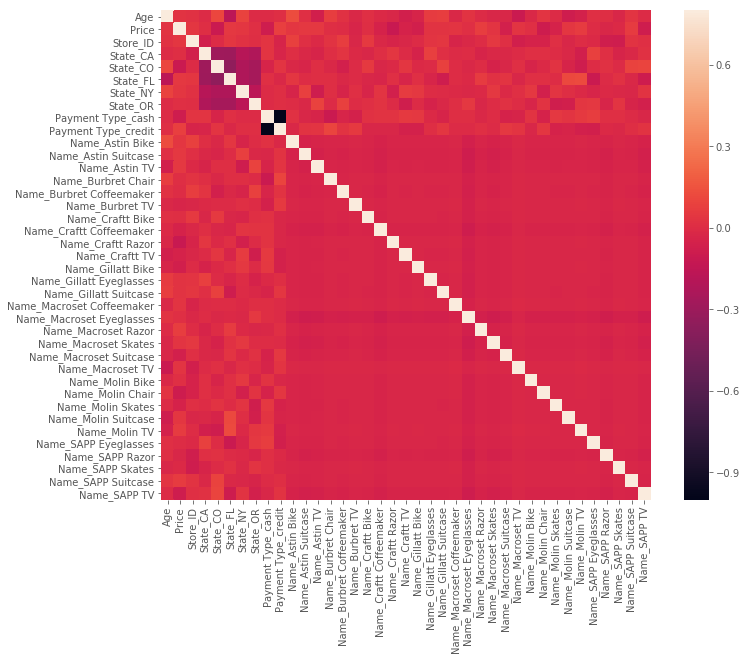

In [139]:
corrmat = df_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)